# House Prices Prediction
![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

In [1]:
# Importing the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import norm

In [2]:
# Let's read the data in...
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# First steps...
## Getting to know our 🏠 data

In [3]:
# Getting the shape of our data
print(f"There are {train_data.shape[0]} rows and {train_data.shape[1]} columns in our train data.")
print(f"There are {test_data.shape[0]} rows and {test_data.shape[1]} columns in our test data.")

There are 1460 rows and 81 columns in our train data.
There are 1459 rows and 80 columns in our test data.


In [4]:
# Let's glimpse at the train data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Helper function to get % of missing in each column
def missing_values(df):
    percentage_missing = df.isnull().sum() * 100 / len(df)
    missing_df = pd.DataFrame({'col_name': df.columns,
                               'percentage_missing': percentage_missing})
    missing_df.sort_values('percentage_missing', ascending = False, inplace = True)
    missing_df = missing_df[percentage_missing > 0]
    return missing_df

In [6]:
# Let's inspect the columns which have at least 1 missing in train data
miss_train_data = missing_values(train_data)
miss_train_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,col_name,percentage_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


Text(0.5, 1.0, '% of values missing by column in train data')

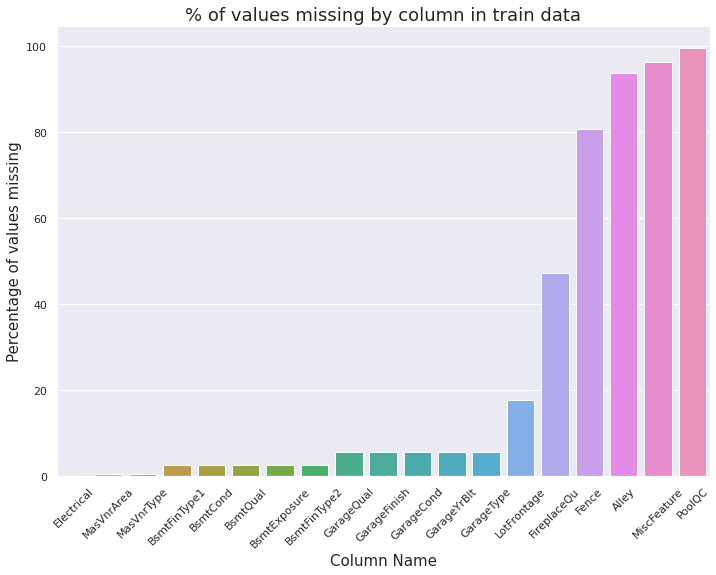

In [7]:
# Let's visualize the columns with missing values in the train data
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="col_name", y="percentage_missing", data=miss_train_data.sort_values('percentage_missing'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Percentage of values missing", fontsize = 15)
ax.set_xlabel("Column Name", fontsize = 15)
ax.set_title('% of values missing by column in train data', fontsize = 18)

In [8]:
train_data[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt',
            'GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure',
            'BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea', 'MasVnrType','Electrical']].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

More than 50% of the data in the columns 'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu' and 'Fence' are missing. so it is better to drop those columns

In [9]:
train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu','Fence'], axis=1, inplace=True)
train_data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0           

Replace the missing values of the columns with numerical variables, i.e, Lotfrontage and MasVnrArea with 'mean value'. 

In [10]:
mean_lotfrontage = train_data['LotFrontage'].astype('float').mean(axis=0)
mean_MasVnrArea = train_data['MasVnrArea'].astype('float').mean(axis=0)

In [11]:
train_data['LotFrontage'].fillna(mean_lotfrontage, inplace=True)
train_data['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)


The missing value percentage of 
'GarageYrBlt
GarageCond
GarageType 
GarageFinish 
GarageQual'
are all same at 5.57%, it is apparent that these values are of same set of houses. So it is not a good idea to drop these details. So let's fill all these missing values with Mode (most frequent value). But for GarageYrBlt - fill it with YearBuilt (year of house Built)


In [12]:
train_data['GarageYrBlt'].fillna(train_data['YearBuilt'], inplace=True)

In [13]:
train_data['GarageCond'].fillna(train_data['GarageCond'].mode(), inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode(), inplace=True)
train_data['GarageType'].fillna(train_data['GarageType'].mode(), inplace=True)
train_data['GarageQual'].fillna(train_data['GarageQual'].mode(), inplace=True)

In [14]:
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode(), inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode(), inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode(), inplace=True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode(), inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode(), inplace=True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode(), inplace=True)

In [15]:

train_data['Electrical'].dropna(axis=0, inplace=True)

In [16]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Lets replace the other missing categorical values with most frequest values.

In [17]:
# Let's glimpse the test data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
# Let's inspect the columns which have at least 1 missing in test data
miss_test_data = missing_values(test_data)
miss_test_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,col_name,percentage_missing
PoolQC,PoolQC,99.794380
MiscFeature,MiscFeature,96.504455
Alley,Alley,92.666210
Fence,Fence,80.123372
FireplaceQu,FireplaceQu,50.034270
LotFrontage,LotFrontage,15.558602
GarageYrBlt,GarageYrBlt,5.346127
GarageQual,GarageQual,5.346127
GarageFinish,GarageFinish,5.346127
GarageCond,GarageCond,5.346127


Text(0.5, 1.0, '% of values missing by column in test data')

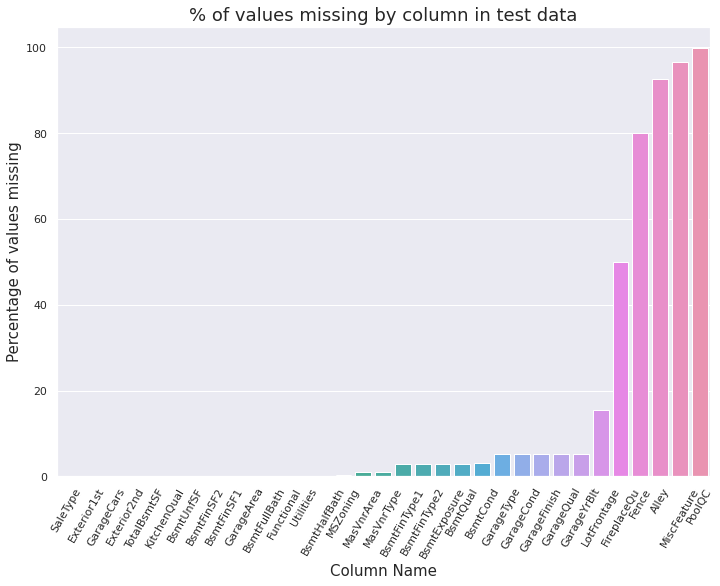

In [19]:
# Let's visualize the columns with missing values in the test data
ax = sns.barplot(x="col_name", y="percentage_missing", data=miss_test_data.sort_values('percentage_missing'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_ylabel("Percentage of values missing", fontsize = 15)
ax.set_xlabel("Column Name", fontsize = 15)
ax.set_title('% of values missing by column in test data', fontsize = 18)

In [20]:
test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu','Fence'], axis=1, inplace=True)
mean_lotfrontage = test_data['LotFrontage'].astype('float').mean(axis=0)
mean_MasVnrArea = test_data['MasVnrArea'].astype('float').mean(axis=0)
test_data['LotFrontage'].fillna(mean_lotfrontage, inplace=True)
test_data['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)

In [21]:
test_data['GarageYrBlt'].fillna(test_data['YearBuilt'], inplace=True)

In [22]:
test_data['GarageCond'].fillna(test_data['GarageCond'].mode(), inplace=True)
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode(), inplace=True)
test_data['GarageType'].fillna(test_data['GarageType'].mode(), inplace=True)
test_data['GarageQual'].fillna(test_data['GarageQual'].mode(), inplace=True)
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode(), inplace=True)
test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode(), inplace=True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode(), inplace=True)
test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode(), inplace=True)
test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode(), inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode(), inplace=True)

In [23]:
test_data.dropna(subset=['SaleType', 'Exterior1st', 'GarageCars', 'Exterior2nd','TotalBsmtSF',
                        'KitchenQual','BsmtUnfSF', 'BsmtFinSF2', 'GarageArea', 'BsmtFullBath',
                        'Functional','Utilities','BsmtHalfBath', 'MSZoning' ], axis=0, inplace=True)

In [24]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [25]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [26]:
train1 = train_data.loc[:, train_data.dtypes==object]
train1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Let's do the ordinal encoding of the categorical variables

In [27]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']] = ordinal_encoder.fit_transform(train_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']])
test_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']] = ordinal_encoder.fit_transform(test_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']])


In [28]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


Text(0.5, 1.0, 'Correlations')

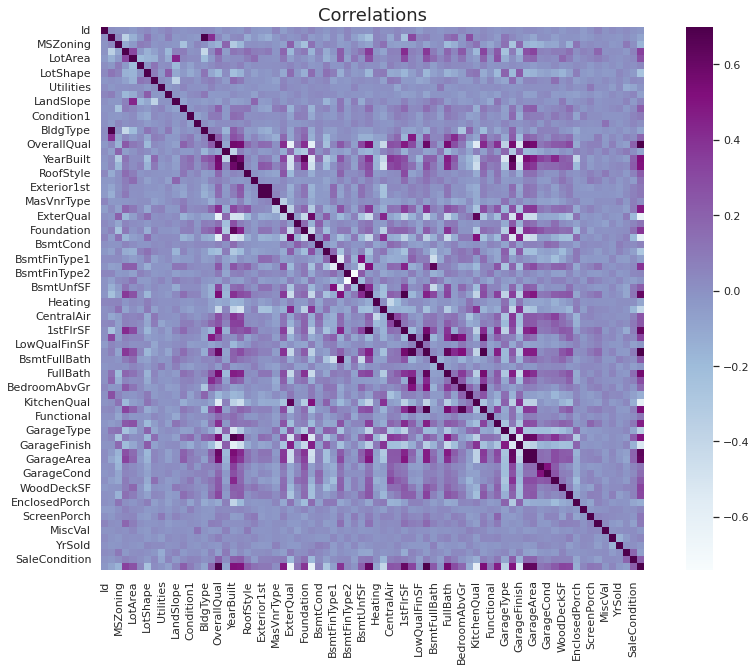

In [29]:
# Create correlation matrix and the heatmap 
corr = train_data.corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True)
ax.set_title("Correlations", fontsize = 18)

It seems that a few variables are highly correlated one with the other, providing the same kind of information. Generally the living area is correlated with the total square feet of the first floor and the second floor, while the year when the garage was built seems to be the same with the year the building was built. Also, the garage area is highly correlated with the car capacity of the garage. 

Text(0.5, 1.0, 'Highly Correlated Variables with Sale Price')

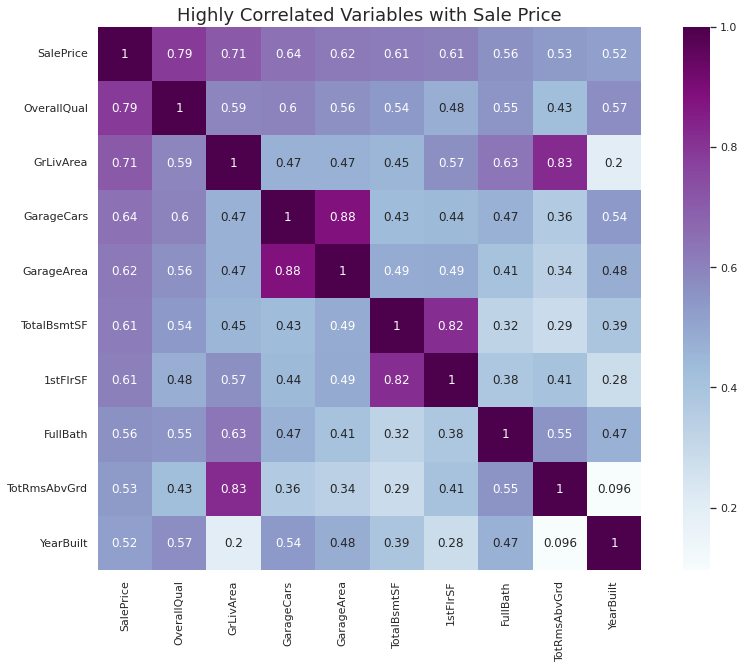

In [30]:
#Let's zoom in on the most correlated variables with our target variable, Sale Price
# We'll analyze only the top 10 most correlated variables

corr_SalePrice = corr.SalePrice.sort_values(ascending = False)
corr_zoomed = train_data[corr_SalePrice[0:10].index].corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_zoomed, cmap="BuPu", square=True, annot = True)
ax.set_title("Highly Correlated Variables with Sale Price", fontsize = 18)

In [31]:
corr_SalePrice[0:10].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

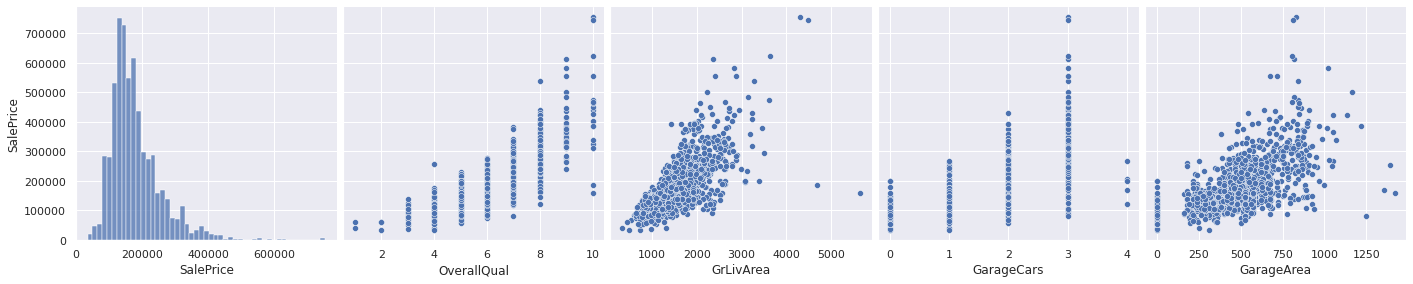

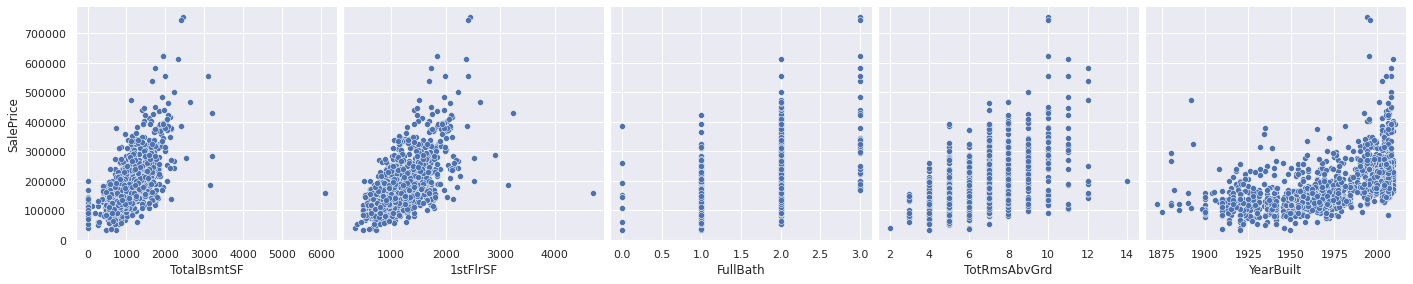

In [32]:
# Let's see the pairwise relations between the highly correlated variables
sns.pairplot(data=train_data, y_vars=['SalePrice'], x_vars=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], height=4)
sns.pairplot(data=train_data, y_vars=['SalePrice'], x_vars=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], height=4)

Text(0.5, 1.0, 'Scatterplot of living area and sale price')

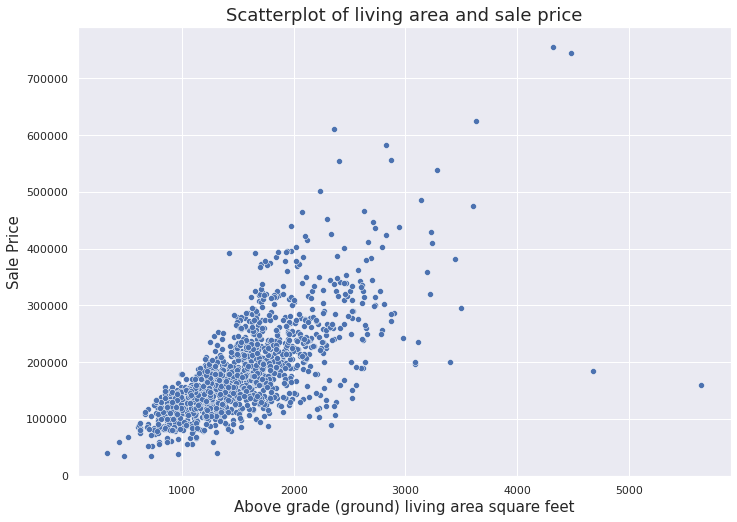

In [33]:
# Let's zoom in on some of the variables
ax = sns.scatterplot(data=train_data, x="GrLivArea", y="SalePrice")
ax.set_ylabel("Sale Price", fontsize = 15)
ax.set_xlabel("Above grade (ground) living area square feet", fontsize = 15)
ax.set_title('Scatterplot of living area and sale price', fontsize = 18)

In [34]:
# The 2 points in the lower right corner don't seem to be following the general trend, therefore we will clasify them as outliers and remove them. 
gr_index = train_data[["SalePrice", "GrLivArea"]].sort_values(by = 'GrLivArea', ascending = False)[:2].index
print("The data for 2 points are:\n--------------------------")
print(train_data.loc[gr_index, ["SalePrice","GrLivArea"]], "\n--------------------------")
train_data = train_data.drop(gr_index)

The data for 2 points are:
--------------------------
      SalePrice  GrLivArea
1298     160000       5642
523      184750       4676 
--------------------------


In [35]:
# Let's store the id column from test and train data into another list so we can drop them as they will not be used in our modelling phase
train_id = train_data['Id']
test_id = test_data['Id']

In [36]:
# Let's drop the id column as we won't use it in our model 
train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

In [37]:
print(f"The new shape of the train data is: {train_data.shape}")
print(f"The new shape of the test data is: {test_data.shape}") 

The new shape of the train data is: (1458, 75)
The new shape of the test data is: (1447, 74)


In [38]:
mu, std = norm.fit(train_data['SalePrice'])
print(mu)
print(std)

180932.91906721535
79467.78892987774


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sale Price Distribution')

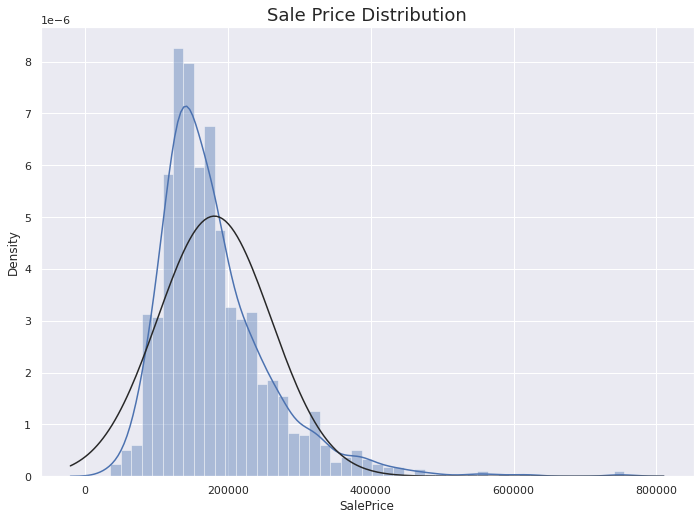

In [39]:
# Let's visualize our target variable ('Sale Price')
ax = sns.distplot(train_data['SalePrice'], fit = norm)
ax.set_title('Sale Price Distribution', fontsize = 18)

In [40]:
# The distribution doesn't look like a normal, let's also check skewness and kurtosis.

print(f"The skewness is {round(skew(train_data['SalePrice'], bias=False), 2)}")
print(f"The kurtosis is {round(kurtosis(train_data['SalePrice'], bias=False), 2)}")

The skewness is 1.88
The kurtosis is 6.52


As confirmed also by the skewness and kurtosis, we are dealing with a highly-skewed leptokurtic distribution.

In [41]:
# Because we don't have a normal distribution, we will use a log transformation on the Sale Price as models perform better when a normal distribution is present.
train_data['SalePrice'] = np.log(train_data['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sale Price Distribution after log transformation')

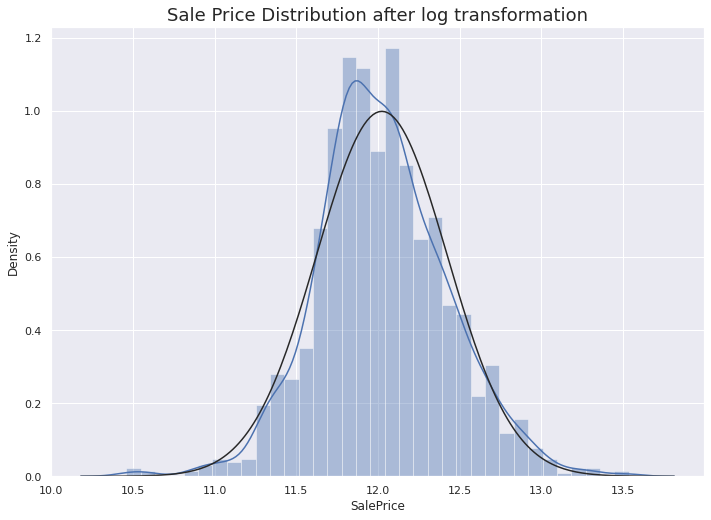

In [42]:
# Let's visualize our target variable ('Sale Price')
ax = sns.distplot(train_data['SalePrice'], fit = norm)
ax.set_title('Sale Price Distribution after log transformation', fontsize = 18)